In [43]:
using Pkg
Pkg.activate(".")
using AutoAI
using Statistics
using Random
using DataFrames: DataFrame
using GR
using Plots
using CSV

  Activating project at `~/phome/julia/AutoMLPipeline.jl/AutoAI`


In [44]:
function ad1(df)
  dfres = DataFrame()
  for learner in keys(AutoAI.CaretAnomalyDetectors.caretadlearner_dict)
    model = CaretAnomalyDetector(learner)
    res = fit_transform!(model, df)
    mname = string(learner)
    dfres = hcat(dfres, DataFrame(mname => res; makeunique=true))
  end
  return dfres
end
function ad2(df)
  clf1 = SKAnomalyDetector("IsolationForest")
  clf2 = SKAnomalyDetector("EllipticEnvelope")
  clf3 = SKAnomalyDetector("OneClassSVM")
  clf4 = SKAnomalyDetector("LocalOutlierFactor")
  res1 = fit_transform!(clf1, df)
  res2 = fit_transform!(clf2, df)
  res3 = fit_transform!(clf3, df)
  res4 = fit_transform!(clf4, df)
  return DataFrame(iso=res1, eli=res2, osvm=res3, lcl=res4)
end
function combine(df)
    a=hcat(ad1(df),ad2(df))
    hcat(a,mean.(eachrow(a)))
end

combine (generic function with 1 method)

In [53]:
function detect(df;groupsize=1000)
    dfsum = map(sum, Iterators.partition(df.BilledCost, groupsize));
    ydf1=combine(DataFrame(:s=>dfsum))
    for i in 0.1:0.1:1.0
        ndx=findall(x->x>=i,ydf1.x1)
        Plots.plot(dfsum, title="AmazonElasticComputeCloud: $(i*100)% voting")
        display(Plots.scatter!(ndx,dfsum[ndx]))
    end
end

detect (generic function with 1 method)

PythonCall.Core.Py


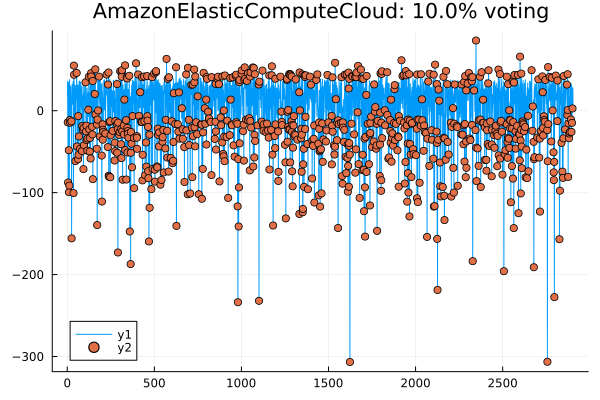

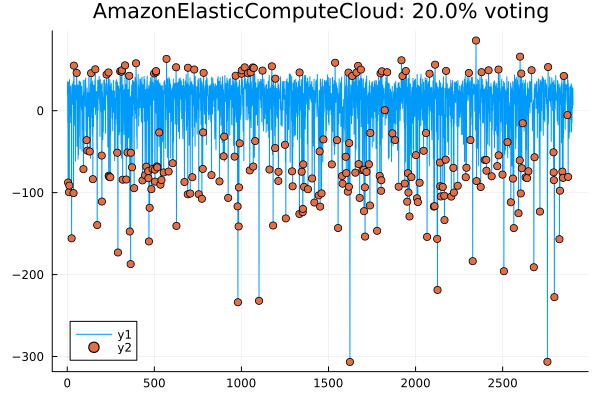

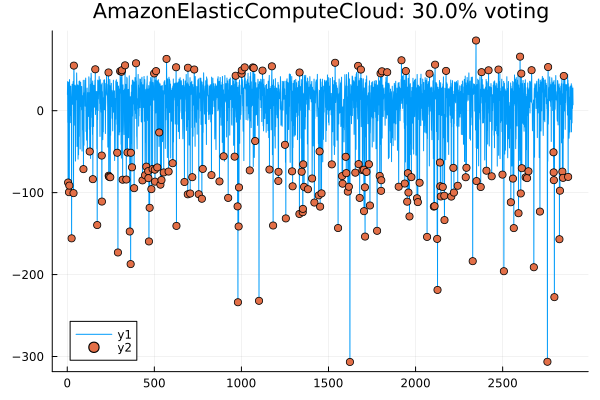

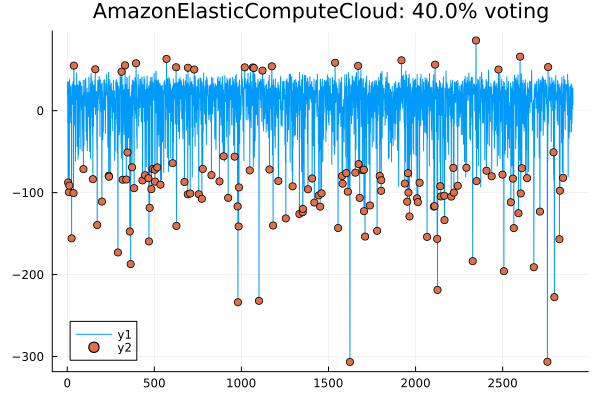

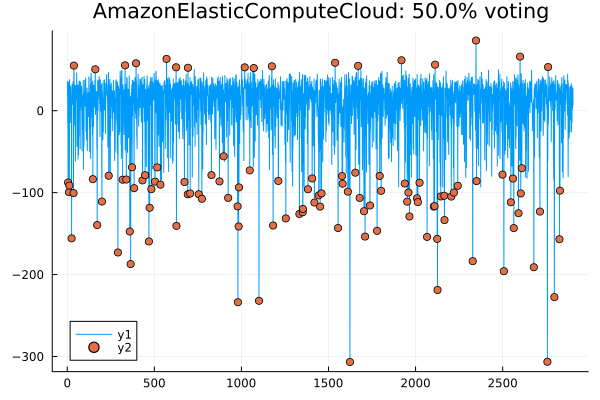

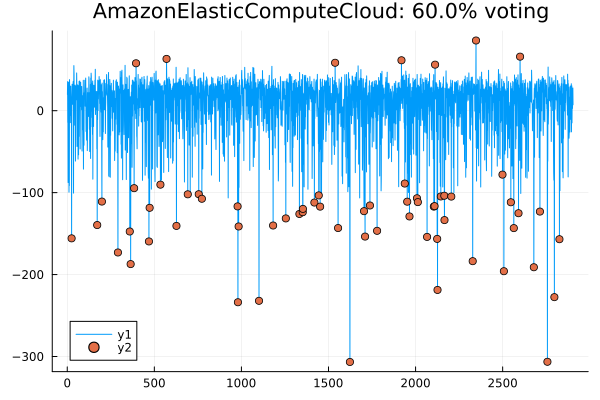

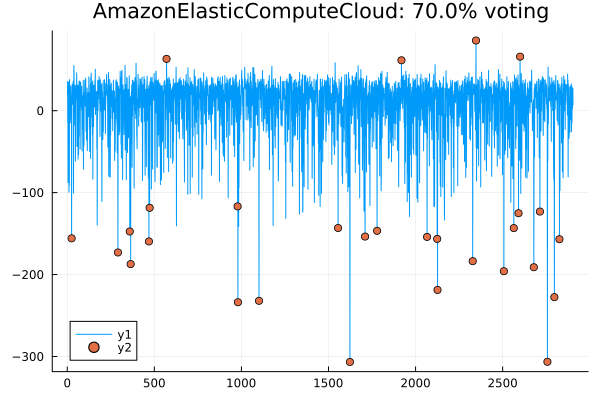

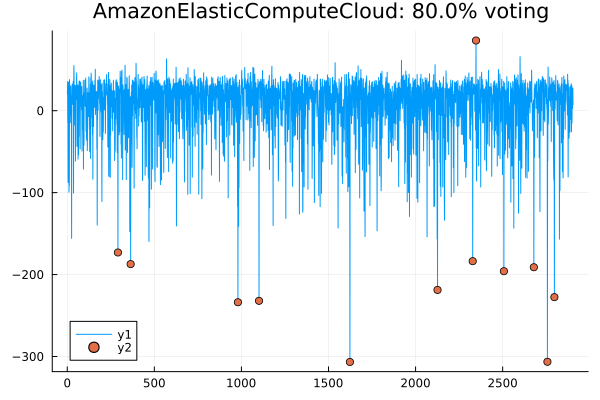

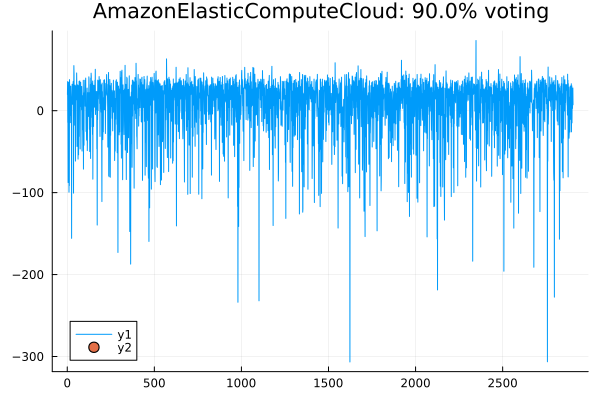

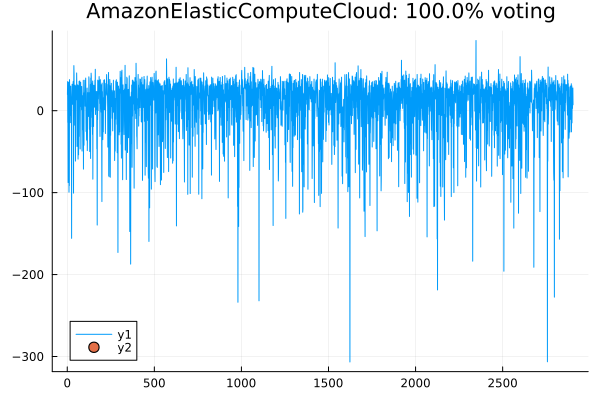

In [54]:
df = CSV.File("./data/BilledCost_AmazonElasticComputeCloud.csv") |> DataFrame;
detect(df)

In [26]:
# gr(show=true)
# for i in 0.1:0.1:1 
#     ndx=findall(x->x>=i,ydf1.x1)
#     Plots.plot(dfsum, title="AmazonElasticComputeCloud: $(i*100)% voting")
#     Plots.GR.beginprint("plots$i.pdf")
#     Plots.scatter!(ndx,dfsum[ndx])
#     Plots.GR.endprint()
# end